# Notebook
Notebook for prototyping and experimenting. 

### New Simulation Config


In [ ]:

beam_settings = load_beam_config(config["beam"])

lenses = [load_lens_config(lc) for lc in config["lenses"]]
stages = [load_sim_stage_config(sc) for sc in config["stages"]]

options = generate_simulation_options(config, "log")
parameters = generate_simulation_parameters(config)


sim_config = SimulationConfig(
    beam=beam_settings,
    lenses=lenses,
    stages=stages,
    parameters=parameters,
    options=options
)


print("SIM CONFIG:")
pprint(sim_config.beam)
print("-"*50)
pprint(sim_config.lenses)
print("-"*50)
pprint(sim_config.stages)
print("-"*50)
pprint(sim_config.parameters)
print("-"*50)
pprint(sim_config.options)



### DASK Experiments


In [ ]:
import time
import dask


@dask.delayed
def inc(x):
    time.sleep(1)
    return x + 1

@dask.delayed
def add(x, y):
    time.sleep(1)
    return x + y

In [ ]:
%%time

a = inc(1)
b = inc(1)
c = add(a, b)
c.visualize("mydask.png")
# c.dask
# c = c.compute()


## Sheet Cleaning Tool
prototype work for sheet cleaning tool

nsize:  5000
shape:  (50, 1, 50001)
centre_max:  27061326.0
mask shape:  (50, 10000)
max z:  21


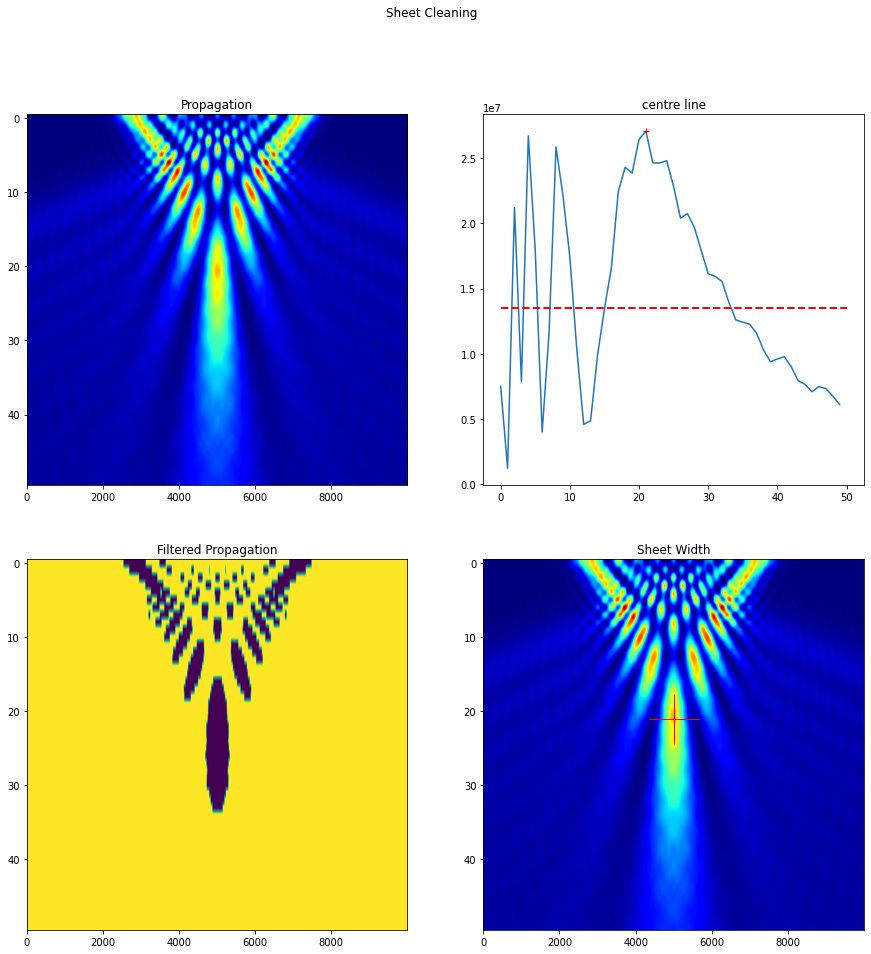

In [2]:
from lens_simulation import utils
from IPython.display import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\neatly-fine-bedbug/mighty-ray\1"
path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\sadly-active-chimp\star-colt\1"


sim = utils.load_simulation(os.path.join(path, "sim.zarr"))

cz = sim.shape[0] // 2
cy = sim.shape[1] // 2
cx = sim.shape[2] // 2
nsize = int(5e-6 / 1e-9)

print("nsize: ",  nsize)
print("shape: ", sim.shape)


sim_slice = sim[:, cy, cx-nsize: cx+nsize]


# plot middle
# max_val = np.max(sim_slice)
# max_z, max_x = np.argmax(sim_slice, 0), np.argmax(sim_slice, 1)
cx_slice = sim_slice.shape[1] // 2
sim_centre = sim_slice[:, cx_slice]
centre_max = np.max(sim_centre)
print("centre_max: ", centre_max)


# filter half maximum
mask = sim_slice < centre_max // 2
print("mask shape: ", mask.shape)


# TODO: sheet width
max_z = np.argmax(sim_centre)
print("max z: ", max_z)






fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0, 0].imshow(sim_slice, aspect="auto", cmap="jet", interpolation="spline36")
ax[0, 0].set_title("Propagation")

ax[0, 1].plot(sim_centre)
ax[0, 1].plot(np.argmax(sim_centre), np.max(sim_centre), "r+", label="Maximum value")
ax[0, 1].set_title("centre line")
ax[0, 1].hlines(centre_max / 2, 0, len(sim_centre), colors="red", linestyles="--", lw=2, label="Half Maximum")

ax[1, 0].imshow(mask, aspect="auto")
ax[1, 0].set_title("Filtered Propagation")

ax[1, 1].imshow(sim_slice, aspect="auto", cmap="turbo", interpolation="spline36")
ax[1, 1].plot(cx_slice, max_z , "r+", ms=50)
ax[1, 1].set_title("Sheet Width")

plt.suptitle("Sheet Cleaning")
plt.show()

# Image(os.path.join(path, "topdown.png"))


### Global Propagation Visualisation
View the entire propagation as a single array plot




In [62]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import utils, plotting
from IPython.display import Image
import os

from pathlib import Path
from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\users\pcle0002\documents\repos\lens_simulation\src\lens_simulation\plotting.py:577: RuntimeWarning: divide by zero encountered in log
  td = np.log(td)
c:\users\pcle0002\documents\repos\lens_simulation\src\lens_simulation\plotting.py:578: RuntimeWarning: divide by zero encountered in log
  so = np.log(so)


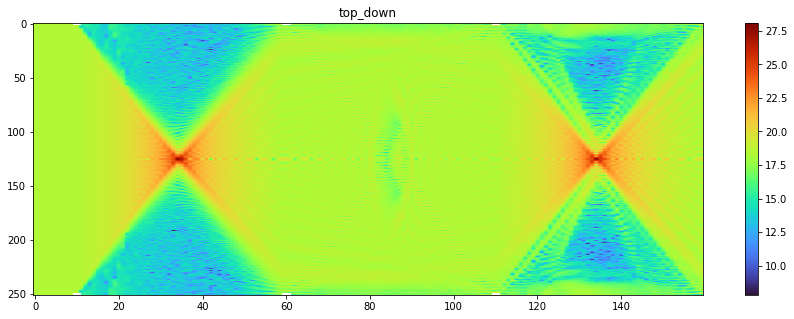

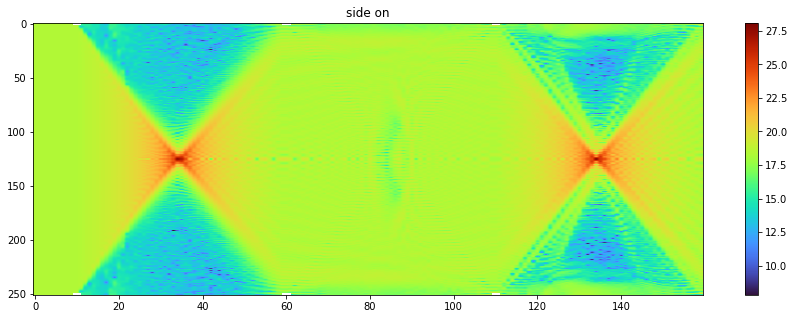

In [65]:
fig_td, fig_so = plotting.plot_sim_propagation(r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\freely-strong-sheep\ideal-possum", 
            log=True, transpose=True)

## Visualisation Tools
New visualisation tools and utils

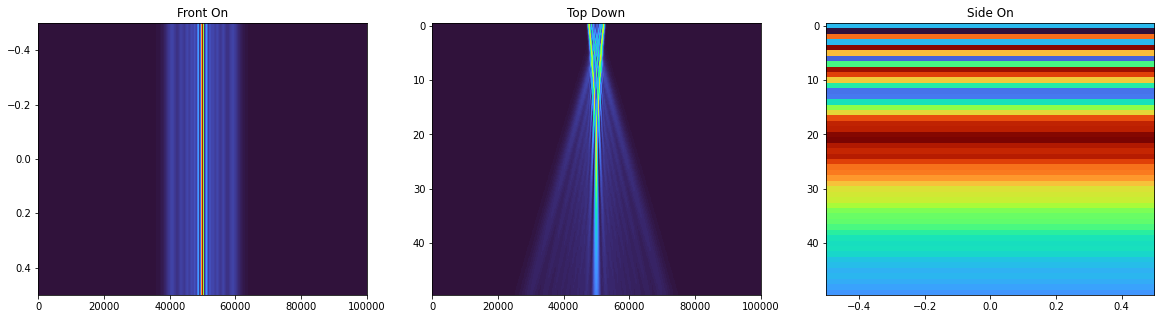

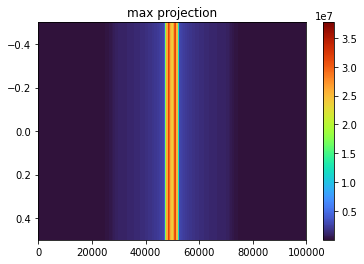

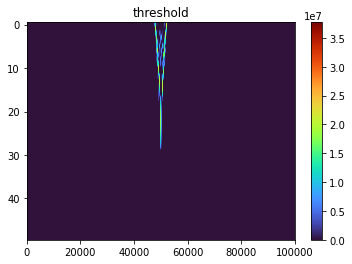

base: shape:  (1, 100001)
crop shape:  (1, 50000)
bounds:  (0, 1, 25000, 75000)


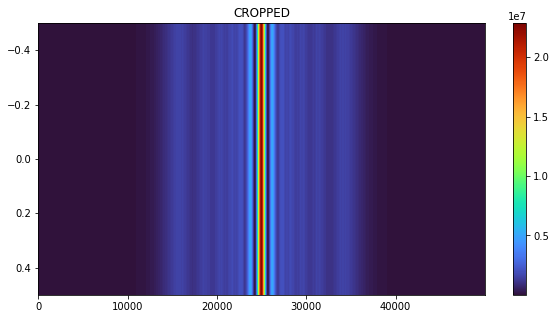

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import utils, plotting
from IPython.display import Image
import os

from pathlib import Path
from pprint import pprint

path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\weekly-suited-ape\pretty-cat/1/sim.zarr"
path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\newly-proven-shrew\guided-ray\1\sim.zarr"
sim = utils.load_simulation(path)

# slice view
front_on = plotting.slice_simulation_view(sim, axis=0, prop=0.5)
top_down = plotting.slice_simulation_view(sim, axis=1, prop=0.5)
side_on = plotting.slice_simulation_view(sim, axis=2, prop=0.5)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].imshow(front_on, aspect="auto", cmap="turbo")
ax[0].set_title("Front On")
ax[1].imshow(top_down, aspect="auto", cmap="turbo")
ax[1].set_title("Top Down")
ax[2].imshow(side_on, aspect="auto", cmap="turbo")
ax[2].set_title("Side On")
plt.show()

# max intesnity projection
max_proj = plotting.max_intensity_projection(sim, axis=0)
plt.imshow(max_proj, aspect="auto", cmap="turbo")
plt.colorbar()
plt.title("max projection")
plt.show()

# threshold
image_threshold = plotting.threshold_image(top_down, threshold=0.5)
plt.imshow(image_threshold, aspect="auto", cmap="turbo")
plt.title("threshold")
plt.colorbar()
plt.show()

# crop
img_crop, bounds = plotting.crop_image_v3(front_on, width=0.5, height=0.2, x=0.5, y=0)
print("base: shape: ", front_on.shape)
print("crop shape: ", img_crop.shape)
print("bounds: ", bounds)
fig = plt.figure(figsize=(10, 5))
plt.imshow(img_crop, aspect="auto", cmap="turbo")
plt.title("CROPPED")
plt.colorbar()
plt.show()


def nice_plot(arr, title="title"):
    plt.imshow(arr, aspect="auto", cmap="turbo")
    plt.colorbar()
    plt.title(title)
    plt.show()

## Light SHeet
Light sheet measurement utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Sheet Size: width = 5.72e-06 m, depth = 7.20e-04m


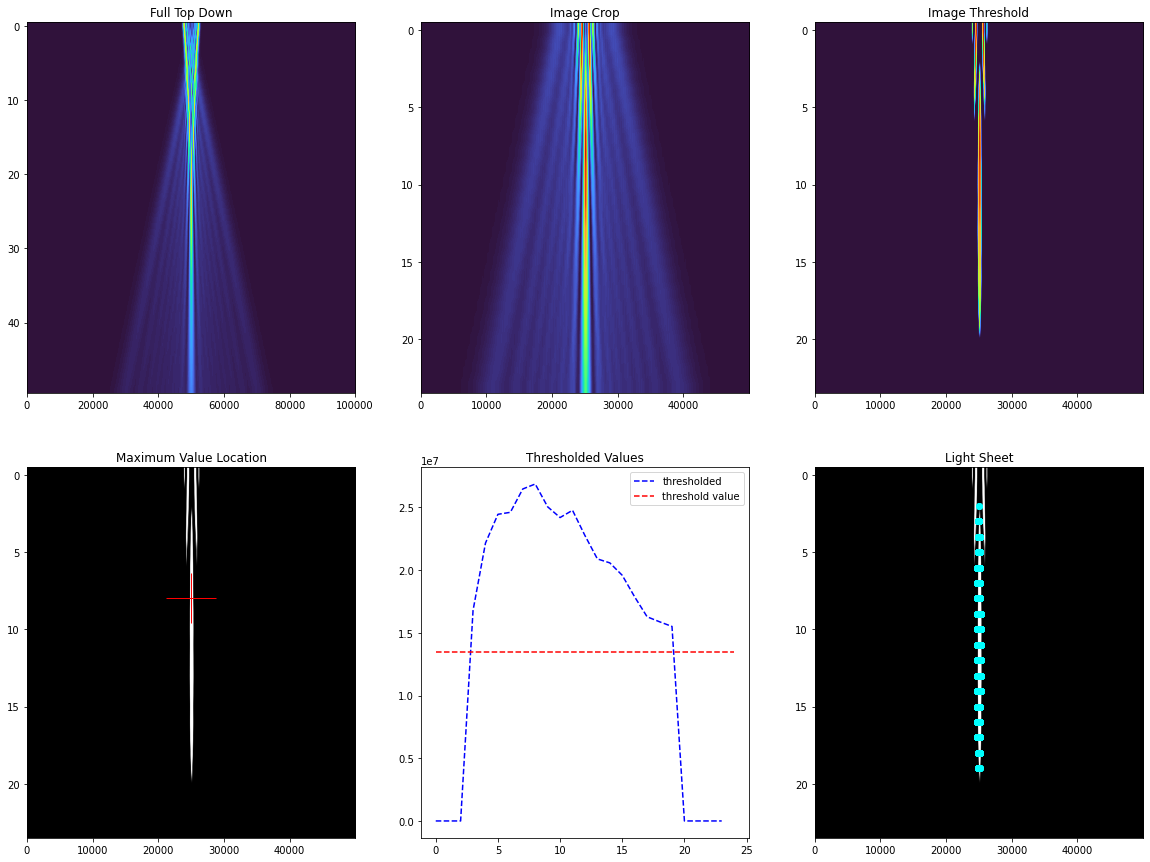

In [56]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import utils, plotting, light_sheet
from IPython.display import Image
import os

from pathlib import Path
from pprint import pprint

### Sheet Measurement

# load sim
path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\openly-ace-crab\still-chimp\1\sim.zarr"
sim = utils.load_simulation(path)

# slice view
# front_on = plotting.slice_simulation_view(sim, axis=0, prop=0.5)
top_down = plotting.slice_simulation_view(sim, axis=1, prop=0.5)
# side_on = plotting.slice_simulation_view(sim, axis=2, prop=0.5)

# crop image
image_crop, bounds = plotting.crop_image_v3(top_down)

# threshold image
threshold = 0.5
image_threshold = plotting.threshold_image(image_crop, threshold)

# get max point and location
mid_threshold = plotting.cross_section_image(image_threshold, axis=1, prop=0.5)
mid_image = plotting.cross_section_image(image_crop, axis=1, prop=0.5)
cz = np.argmax(mid_threshold)
cx = image_threshold.shape[1] // 2

threshold_value = np.max(mid_threshold) * threshold
max_length_px, max_width_px, (x, y) = light_sheet.calculate_sheet_size_pixels(image_threshold, threshold_value)

# print(f"sheet length: {max_length_px}px")
# print(f"max width at: {max_width_x0}, {max_width_x1}")
# print(f"max_width: {max_width_px}px at z: {max_width_z}px")

metadata = utils.load_metadata(os.path.dirname(os.path.dirname(path)))

# calculate sheet dimensions
sheet_depth, sheet_width = light_sheet.calculate_sheet_size(metadata, max_length_px, max_width_px)

print(f"Sheet Size: width = {sheet_width:.2e} m, depth = {sheet_depth:.2e}m")

fig, ax = plt.subplots(2, 3, figsize=(20, 15))

ax[0, 0].imshow(top_down, aspect="auto", cmap="turbo")
ax[0, 0].set_title("Full Top Down")

ax[0, 1].imshow(image_crop,aspect="auto", cmap="turbo")
ax[0, 1].set_title("Image Crop")

ax[0, 2].imshow(image_threshold, aspect="auto", cmap="turbo")
ax[0, 2].set_title("Image Threshold")

ax[1, 0].imshow(image_threshold.astype(bool), aspect="auto", cmap="gray")
ax[1, 0].plot(cx, cz, "r+", ms=50, linewidth=200)
ax[1, 0].set_title("Maximum Value Location")

ax[1, 1].plot(mid_threshold, "b--", label="thresholded")
ax[1, 1].hlines(np.max(mid_threshold) * threshold, 0, mid_threshold.shape[0], "r", linestyles="--", label="threshold value")
ax[1, 1].legend(loc="best")
ax[1, 1].set_title("Thresholded Values")

ax[1, 2].imshow(image_threshold.astype(bool), aspect="auto", cmap="gray")
# plt.plot(cx, cz, "r+", ms=50, linewidth=20)
# plt.plot(cx, min_z, "c+", ms=50)
# plt.plot(cx, max_z, "c+", ms=50)
# plt.plot(max_width_x0, max_width_z, "m+", ms=50)
# plt.plot(max_width_x1, max_width_z, "m+", ms=50)
ax[1, 2].scatter(y, x, c="cyan")
ax[1, 2].set_title("Light Sheet")
plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Sheet Depth: 4.80e-04m, Sheet Width: 4.10e-06m


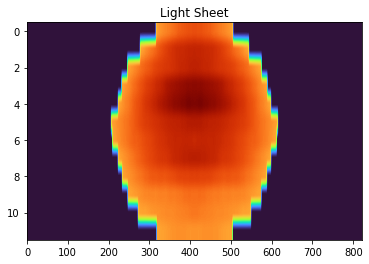

In [29]:
# USE THIS VERSION
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import utils, plotting, light_sheet
from IPython.display import Image
import os

from pathlib import Path
from pprint import pprint

# load sim
path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\openly-ace-crab\still-chimp\1\sim.zarr"

# calculate light sheet
sheet_depth, sheet_width, image_sheet = light_sheet.calculate_light_sheet_dimensions(path)

print(f"Sheet Depth: {sheet_depth:.2e}m, Sheet Width: {sheet_width:.2e}m")
plt.imshow(image_sheet, aspect="auto", cmap="turbo")
plt.title("Light Sheet")
plt.show()

### Custom Config

Load a custom config from key (allows for sweeping configs)


In [34]:
%load_ext autoreload
%autoreload 2
from lens_simulation import utils, validation, Simulation, SimulationRunner
from pprint import pprint

from lens_simulation.Lens import generate_lens
from lens_simulation.Medium import Medium

config = utils.load_config("config_minimum.yaml")
config["log_dir"] = "log"


sim_runner = SimulationRunner.SimulationRunner("config.yaml")
sim_runner.setup_simulation()

conf_1 = sim_runner.simulation_configurations[0]
for conf in sim_runner.simulation_configurations:

    pprint(conf)
    print("------------ AFTER -------------- ")
    sim = Simulation.Simulation(conf)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'beam': {'distance_mode': 'Direct',
          'final_diameter': None,
          'final_diameter_step': None,
          'final_diameter_stop': None,
          'focal_multiple': None,
          'focal_multiple_step': None,
          'focal_multiple_stop': None,
          'height': 0.0003,
          'height_step': None,
          'height_stop': None,
          'n_steps': 2,
          'numerical_aperture': None,
          'numerical_aperture_step': None,
          'numerical_aperture_stop': None,
          'output_medium': 1.0,
          'position_x': 0.0,
          'position_x_step': None,
          'position_x_stop': None,
          'position_y': 0.0,
          'position_y_step': None,
          'position_y_stop': None,
          'shape': 'Rectangular',
          'source_distance': 0.0001,
          'source_distance_step': None,
          'source_distance_stop': None,
          'spread': 'Plane',
   

ValueError: Cannot load file containing pickled data when allow_pickle=False

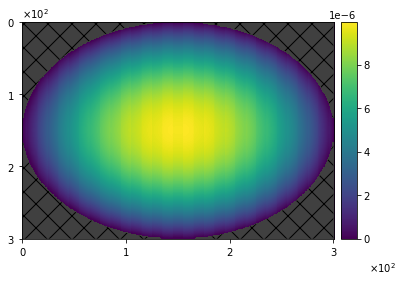

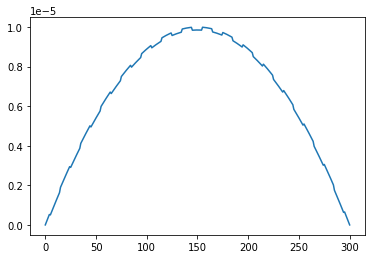

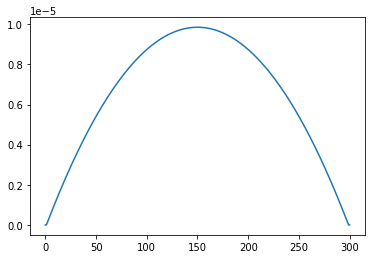

In [61]:
config = utils.load_config("config.yaml")
from lens_simulation.Lens import Lens, generate_lens
from lens_simulation.Medium import Medium
from lens_simulation import plotting

config["lenses"][0]["lens_type"] = "Spherical"

lens = generate_lens(config["lenses"][0], Medium(2.348), 1e-6)

plotting.plot_lens_profile_2D(lens)
plt.show()

img = plotting.cross_section_image(lens.profile, 0)
plt.plot(img)
plt.show()

img = plotting.cross_section_image(lens.profile, 1)
plt.plot(img)
plt.show()


np.save("lens.npy", lens.profile)

### Mega Stack
Stack multiple simulations together for synchronised visualisation


In [13]:
%load_ext autoreload
%autoreload 2


# TODO: stage stacking


from lens_simulation import utils, plotting
import matplotlib.pyplot as plt
import numpy as np

import dask.array as da

paths = [
    r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\weekly-famous-lizard\active-shark",
    r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\weekly-famous-lizard\fit-jennet",
    r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\weekly-famous-lizard\moral-skink"
    ]

mega = None
for p in paths:

    sim = plotting.load_full_sim_propagation_v2(p)

    if mega is None:
        mega = sim
    else: 
        mega = np.hstack([mega, sim])
    
    print("sim shape: ", sim.shape)
    print("mega shape: ", mega.shape)


print("final: ", mega.shape)

mega_view = plotting.slice_simulation_view(mega)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
sim shape:  (110, 2001, 2001)


AttributeError: 'NoneType' object has no attribute 'shape'

In [19]:
%load_ext autoreload
%autoreload 2

from lens_simulation import utils, plotting
import matplotlib.pyplot as plt
import numpy as np

import dask.array as da
import os

paths = [
    r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\weekly-famous-lizard\active-shark",
    r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\weekly-famous-lizard\fit-jennet",
    r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\weekly-famous-lizard\moral-skink"
    ]

data = []
for p in paths:
    print(f"load sim_{os.path.basename(p)}")
    sim = plotting.load_full_sim_propagation_v2(p)

    data.append(da.from_array(sim))
    
    # print("sim shape: ", sim.shape)
    # print("mega shape: ", mega.shape)

#
mega = da.concatenate(data, axis=1)

print("final: ", mega.shape)

mega_view = plotting.slice_simulation_view(mega)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
load sim_active-shark
load sim_fit-jennet
load sim_moral-skink
final:  (110, 6003, 2001)


In [18]:
import napari
from magicgui import magicgui
from napari.layers import Image
from napari.types import ImageData

# create a viewer and add some images
viewer = napari.Viewer()
viewer.add_image(mega, name="simulation", colormap="turbo", scale=[1, 0.1, 0.1])

# turn the gaussian blur function into a magicgui
# for details on why the `-> ImageData` return annotation works:
# https://napari.org/guides/magicgui.html#return-annotations
@magicgui(
    # tells magicgui to call the function whenever a parameter changes
    auto_call=True,
    # `widget_type` to override the default (spinbox) "float" widget
    prop={"widget_type": "FloatSlider", "max": 1.0},
    axis={"choices": [0, 1, 2]},
    layout="horizontal",
)
def slice_image(layer: Image, prop: float = 0.5, axis: int = 0) -> ImageData:
    """Slice the volume along the selected axis"""
    if layer:
        return plotting.slice_simulation_view(layer.data, axis=axis, prop=prop)

# Add it to the napari viewer
# viewer.window.add_dock_widget(slice_image, area="bottom")

napari.run()

c:\Users\pcle0002\Miniconda3\envs\lens_sim\lib\site-packages\napari_tools_menu\__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
